In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms

In [23]:
data = pd.read_csv("bensin.csv")
data.head()

,Liter,Kilometer
0,20,142.0
1,25,177.0
2,20,144.0
3,30,203.0
4,40,273.0


In [24]:
data.describe()

,Liter,Kilometer
count,65.000000,65.000000
mean,26.446154,181.064615
std,7.424686,49.741763
min,6.000000,32.000000
25%,23.000000,144.000000
50%,25.000000,177.000000
75%,30.000000,212.000000
max,45.000000,278.000000


In [25]:
#cek missing value
print(f"jumlah missing value : \n{data.isnull().sum()}")
#cek duplicate data
print(f"jumlah data duplikat: \n {data.duplicated().sum()}")

jumlah missing value : 
Liter        0
Kilometer    0
dtype: int64
jumlah data duplikat: 
 8


c:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'kilometer')

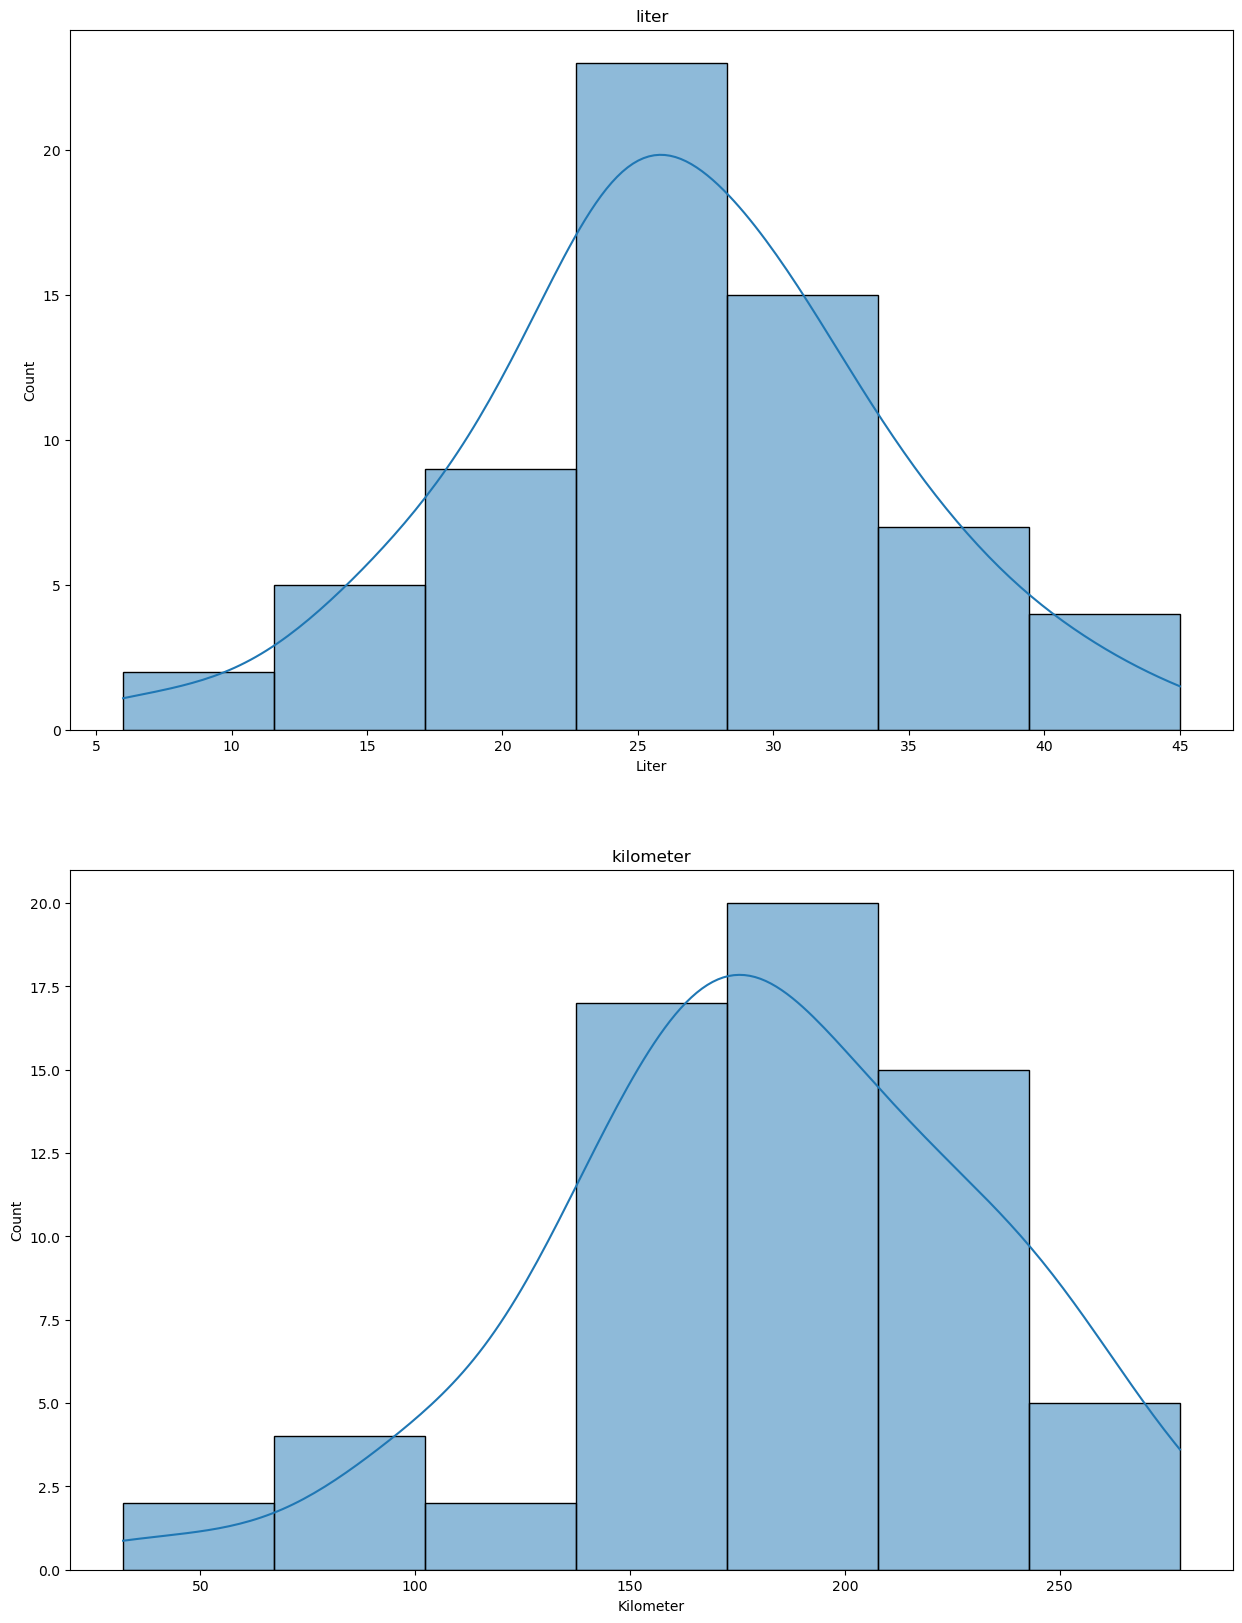

In [26]:
#univariate analysis

fig,axs = plt.subplots(2, figsize=(15,20))
#histogram liter
n1 = len(data['Liter'])
k1 = int(1 + np.log2(n1))

sns.histplot(data = data['Liter'],bins=k1,kde=True,ax=axs[0])
axs[0].set_title("liter")

#histogram kilometer
n2 = len(data['Kilometer'])
k2 = int(1 + np.log2(n2))

sns.histplot(data = data['Kilometer'],bins=k2,kde=True,ax=axs[1])
axs[1].set_title("kilometer")

dari visualisasi data diatas, diketahui fitur liter datanya terdistribusi normal sedangkan kilometer terdistribusi negatif skewed

Text(0.5, 1.0, 'kilometer')

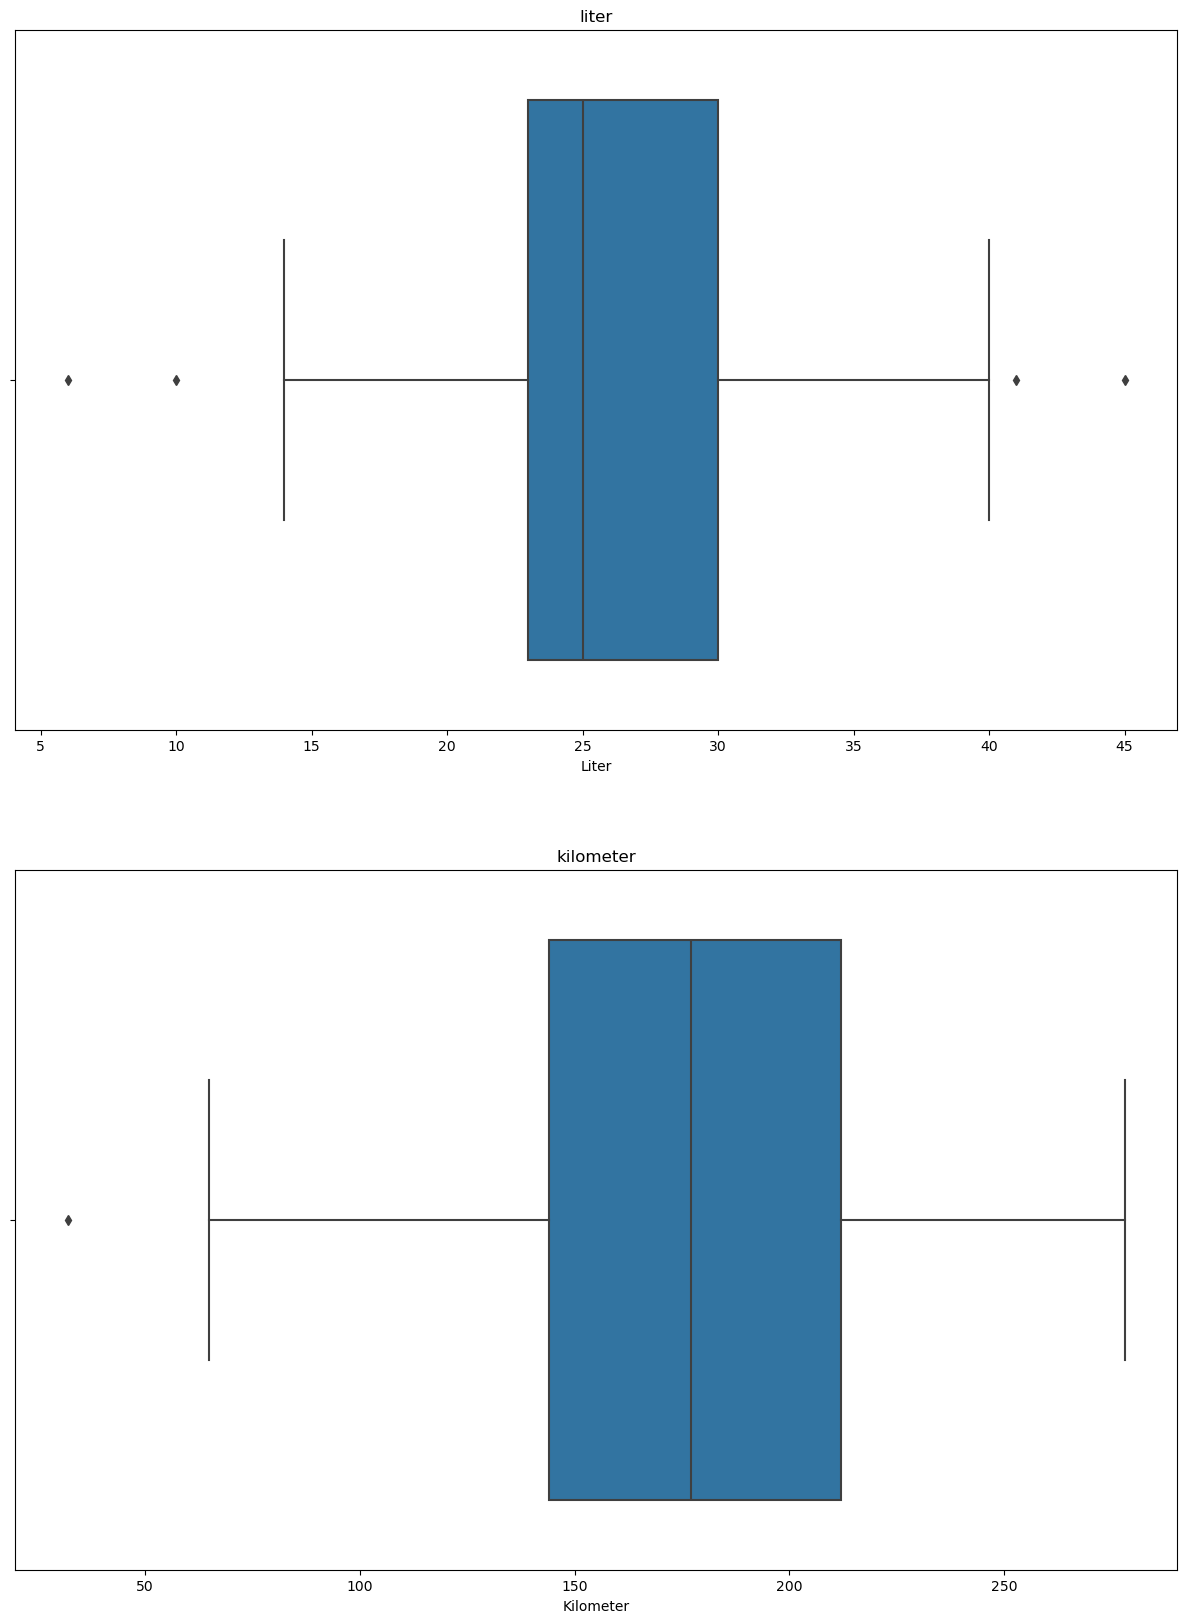

In [27]:
#mengecek outlier
#boxplot liter
fig,axs = plt.subplots(2,figsize=(15,20))
sns.boxplot(x=data['Liter'],orient='h',ax=axs[0])
axs[0].set_title("liter")

#boxplot kilometer
sns.boxplot(x=data['Kilometer'],orient='h',ax=axs[1])
axs[1].set_title("kilometer")

Text(0.5, 1.0, 'hubungan liter dan kilometer')

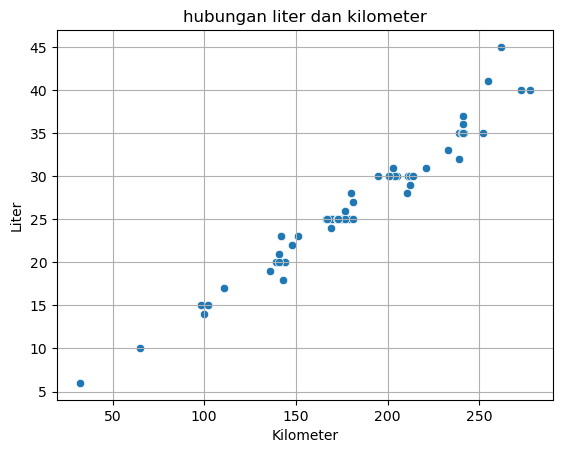

In [28]:
#bivariate analysis

sns.scatterplot(x=data['Kilometer'],y=data['Liter'])
plt.grid()
plt.title("hubungan liter dan kilometer")

              Liter  Kilometer
Liter      1.000000   0.980485
Kilometer  0.980485   1.000000


Text(0.5, 1.0, 'heatmap korelasi liter dan kilometer')

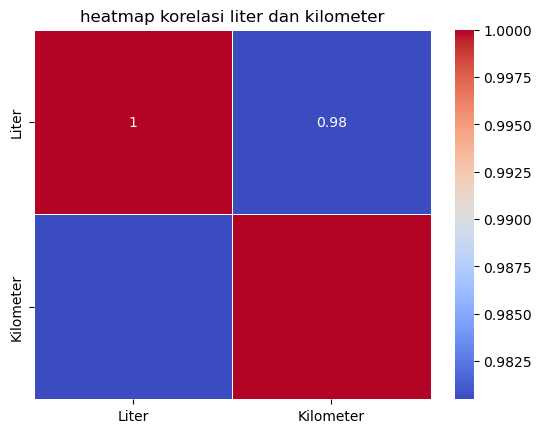

In [29]:
#multivariate analysis
#membuat correlation matrix
correltaion = data.corr()
print(correltaion)

sns.heatmap(correltaion,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("heatmap korelasi liter dan kilometer")

dari correlation matrix diatas dapat diakatakan bahwa fitur liter dan kilometer saling berkolerasi positif

In [45]:
#menerapkan model linear regression

#split data set ke traning set dan test set

liter = data[['Liter']]
kilometer = data[['Kilometer']]
X_train,X_test,y_train,y_test = ms.train_test_split(liter,kilometer,test_size=0.2,random_state=0)
print(X_train.size,X_test.size)



52 13


X_train atau y_train diharapkan berbentung array 2D(matriks)
untuk kasus linear regression dari scikit-learn, input fitur(x_train) harus berupa matriks(2D array)

pake [['fitur']]

In [58]:
#melatih model
model = LinearRegression()
model.fit(X_train,y_train)

#melihat nilai slope
slope = model.coef_
print(f"nilai slope: {slope}")

#melihat nilai intercept
intercept = model.intercept_
print(f"nilai intercept: {intercept}")

nilai slope: [[6.45829591]]
nilai intercept: [10.64122249]


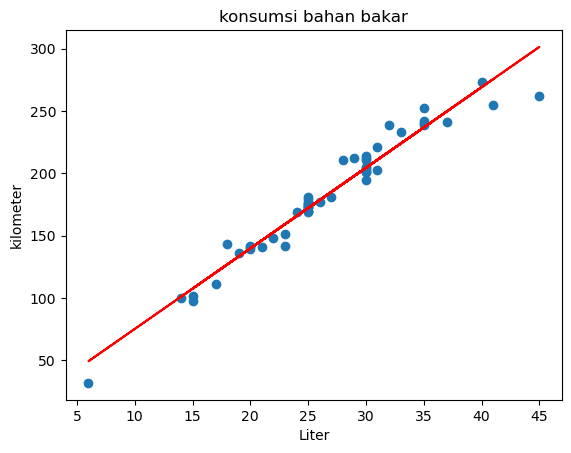

In [73]:
#visualisasi
plt.scatter(X_train,y_train)
plt.title("konsumsi bahan bakar")
plt.xlabel("Liter")
plt.ylabel("kilometer")
plt.plot(X_train, model.predict(X_train), color='red')
plt.show()


In [63]:
#pengujian terhadap model dengan test dataset
r2 = model.score(X_test,y_test)
print(r2)

0.9798523775622333


In [65]:
#melakukan prediksi: misalnya memperkirakan berapa kilometer yang bisa ditempuh dengan 60 liter bensin

jarak = model.predict([[60]])
print(f"jarak yang bisa ditempuh dengan 60 liter bensin{jarak}")

jarak yang bisa ditempuh dengan 60 liter bensin[[398.13897723]]


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [66]:
#melakukan prediksi menggunakn test dataset
prediksi = model.predict(X_test)
print(prediksi)

[[107.51566118]
 [172.0986203 ]
 [172.0986203 ]
 [159.18202848]
 [139.80714074]
 [268.97305898]
 [204.39009986]
 [236.68157942]
 [ 75.22418162]
 [243.13987534]
 [172.0986203 ]
 [139.80714074]
 [191.47350804]]


In [67]:
print(y_test)

    Kilometer
45      102.0
29      167.0
43      177.0
62      142.0
34      144.0
33      278.0
31      211.0
40      241.0
26       65.0
63      241.0
22      166.2
2       144.0
11      180.0
